Identifying patterns in text using machine learning

Using doc2vec and sent2vec significantly improves the accuarcy of the model


 We may be
required to handle unstructured data; perform outlier analysis, invalid data analysis, and
duplicate data analysis; identify correlated features; and more. However, we will focus on
some of the most widely used preprocessing steps that are almost always required.

We will be performing preprocessing on the Tips dataset, which comes with the seaborn
Python package. First, let's import the dataset and print out the first five lines to gain a
basic understanding of the dataset

In [1]:
import seaborn as sns
tips_df=sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips_df.shape

(244, 7)

Data cleaning and pre processing

In [6]:
tips_df.isnull().values.any()

False

In [7]:
tips_df.isnull().any()

total_bill    False
tip           False
sex           False
smoker        False
day           False
time          False
size          False
dtype: bool

In [8]:
tips_df.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool

If we were to identify the null values we can use following methods

Dropping the row/column with NaN value(s). The dropna() function can be
used to drop rows/columns containing NaN value(s).
Replacing the NaN value with another value. The value could be the previous
value, the next value, zero, the mean of the row or column, and so on. This can be
done using the fillna() function.

In the tips column there are categorical varibales viz sex, smoker, day and time and these kinds of text data should be converted to numeric values we can do this by using labelEncoder form

We are selecting all rows and non_numeric columns and apply LabelEncoder to those values

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoding=LabelEncoder()
tips_df.iloc[:,[2,3,4,5]]=tips_df.iloc[:,[2,3,4,5]].apply(label_encoding.fit_transform)

<ipython-input-10-cde2009b6394>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tips_df.iloc[:,[2,3,4,5]]=tips_df.iloc[:,[2,3,4,5]].apply(label_encoding.fit_transform)


In [13]:
tips_df.iloc[:,[2,3,4,5]]

,sex,smoker,day,time
0,0,0,2,0
1,1,0,2,0
2,1,0,2,0
3,1,0,2,0
4,0,0,2,0
...,...,...,...,...
239,1,0,1,0
240,0,1,1,0
241,1,1,1,0
242,1,0,1,0


In [16]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


To map non-numeric values to the encoded values you can use the fit function on the relevant column and then print on the uniques values for that column.

In [17]:
label_encoding=LabelEncoder()
col_fit=label_encoding.fit(tips_df["day"])
dict(zip(col_fit.classes_,col_fit.transform(col_fit.classes_)))

{0: 0, 1: 1, 2: 2, 3: 3}

The issues wih encoding categorical variables that are nominal and not ordinal creates a complication. If we use the values and assign them 1 for sunday, 2 for monday then it will create a situation where 2 will be considered greater then 1 which in not the correct treatment of thesee values.

To address this issues we can use one hot encoding

use the remainder=passthrough argument to ignore
other columns.

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
oh_encoding=ColumnTransformer([('OneHotEncoding',
                                OneHotEncoder(),[2,3,4,5])],remainder='passthrough')
tips_df_ohe=oh_encoding.fit_transform(tips_df)
tips_df_ohe

array([[ 1.  ,  0.  ,  1.  , ..., 16.99,  1.01,  2.  ],
       [ 0.  ,  1.  ,  1.  , ..., 10.34,  1.66,  3.  ],
       [ 0.  ,  1.  ,  1.  , ..., 21.01,  3.5 ,  3.  ],
       ...,
       [ 0.  ,  1.  ,  0.  , ..., 22.67,  2.  ,  2.  ],
       [ 0.  ,  1.  ,  1.  , ..., 17.82,  1.75,  2.  ],
       [ 1.  ,  0.  ,  1.  , ..., 18.78,  3.  ,  2.  ]])

One-hot encoding involves converting categorical variables into binary vectors where each category is represented by a binary indicator variable. However, if we represent all categories of a categorical variable using dummy variables, it can lead to multicollinearity issues.

Multicollinearity occurs when independent variables in a regression model are highly correlated. In the context of one-hot encoding, if we include dummy variables for all categories of a categorical variable, one category's presence can be predicted from the absence of the others. This creates perfect multicollinearity, where the dummy variables are linearly dependent on each other.

To address the dummy variable trap, one commonly used approach is to drop one of the dummy variables for each categorical variable. This means that for a categorical variable with
�
n unique categories, only
n−1 dummy variables are used in the model. This ensures that there is no perfect multicollinearity among the dummy variables.

**Data Standarization**

Preprocssing steps to convert all the values into the similar ranges. So that columns having values with higher ranges i.e [-500,500] and column having values with lower ranges[-10,10] all will have equal infulence over the model


*   Min-Max standarization
*   Z-score standarization



In [23]:
#Min-max standarization
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
tips_df_std=minmax.fit_transform(tips_df_ohe)
tips_df_std

array([[1.        , 0.        , 1.        , ..., 0.29157939, 0.00111111,
        0.2       ],
       [0.        , 1.        , 1.        , ..., 0.1522832 , 0.07333333,
        0.4       ],
       [0.        , 1.        , 1.        , ..., 0.3757855 , 0.27777778,
        0.4       ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.41055718, 0.11111111,
        0.2       ],
       [0.        , 1.        , 1.        , ..., 0.30896523, 0.08333333,
        0.2       ],
       [1.        , 0.        , 1.        , ..., 0.32907415, 0.22222222,
        0.2       ]])

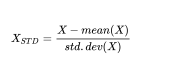

In [24]:
#Z-score standarization
from sklearn.preprocessing import StandardScaler
zs=StandardScaler()
tips_df_std=zs.fit_transform(tips_df_ohe)
tips_df_std

array([[ 1.34335316e+00, -1.34335316e+00,  7.84789169e-01, ...,
        -3.14711305e-01, -1.43994695e+00, -6.00192629e-01],
       [-7.44405889e-01,  7.44405889e-01,  7.84789169e-01, ...,
        -1.06323531e+00, -9.69205340e-01,  4.53382921e-01],
       [-7.44405889e-01,  7.44405889e-01,  7.84789169e-01, ...,
         1.37779900e-01,  3.63355539e-01,  4.53382921e-01],
       ...,
       [-7.44405889e-01,  7.44405889e-01, -1.27422758e+00, ...,
         3.24629502e-01, -7.22971264e-01, -6.00192629e-01],
       [-7.44405889e-01,  7.44405889e-01,  7.84789169e-01, ...,
        -2.21286504e-01, -9.04025732e-01, -6.00192629e-01],
       [ 1.34335316e+00, -1.34335316e+00,  7.84789169e-01, ...,
        -1.13228903e-01,  1.24660453e-03, -6.00192629e-01]])

Naive-Bayes algorithm


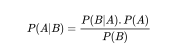

Building a sentiment analyzer using Naive Bayes algorithm

In [25]:
import pandas as pd
data=pd.read_csv('/content/amazon_cells_labelled.txt',sep='\t',header=None)

In [26]:
data.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [27]:
x=data.iloc[:,0]#all rows with first column
y=data.iloc[:,-1]

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(stop_words='english')
X_vec=vectorizer.fit_transform(x)
X_vec.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf=TfidfTransformer()
X_tfdif=tfidf.fit_transform(X_vec)
X_tfdif.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Now after preprocessing we can evaluate the model but first we need to split the data into train test. It can be done by using sklearn

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X_tfidf,y,test_size=0.25,random_state=42)

Training the model

In [48]:
import numpy as np
X_train_array = np.asarray(X_train)
y_train_array = np.asarray(y_train)
X_test=np.asarray(X_test)
y_test=np.asarray(y_test)

In [46]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(X_train_array,y_train_array)

MultinomialNB()

In [49]:
y_pred=clf.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 93,  28],
       [ 19, 110]])

The vertical axis of sklearn's confusion
matrix should be interpreted as the actual values, while the horizontal axis should be
interpreted as the predicted values.

The model predicts 112 (93+20) values as having sentiment score of 0, out of which 93 were correctly predicted and 19 were incorrect

Likewise model predict 138(28+110) as sentiment 1, out of which 110 were correclty predicted and 28 were incorrect